# Step 1 - Criando CSV
    link para baixar arquivos: 
    
   https://www.kaggle.com/netflix-inc/netflix-prize-data
    
    Junção dos 4 arquivos txts e criação de um único csv chamado "dataset.csv"

##### Imports

In [2]:
import os
import numpy as np
import pandas as pd
from datetime import datetime

##### Carregando dados

Listando o que tem no diretório

In [ ]:
dir = 'archive/'
lista_dir = os.listdir(dir)
lista_dir

In [ ]:
%%time
begin = datetime.now()

arquivos = [dir+'combined_data_1.txt',
            dir+'combined_data_2.txt',
            dir+'combined_data_3.txt',
            dir+'combined_data_4.txt']

# Cria e abre o arquivo para gravação
dataset = open('archive/dataset.csv', mode = 'w')

# Lista para as linhas dos arquivos
linhas = list()

for arquivo in arquivos:
    print('Lendo ', (arquivo), ' ...')

    # Com o arquivo aberto, extraímos as linhas
    with open(arquivo) as f:

        # Loop por cada linha do arquivo
        for linha in f: 

            # Deletamos o conteúdo da lista
            del linhas[:] 

            # Divide as linhas do arquivo pelo caracter de final de linha
            linha = linha.strip()

            # Se encontramos "dois pontos" ao final da linha, fazemos replace removendo o caracter,
            # pois queremos apenas o id do filme
            if linha.endswith(':'):
                movie_id = linha.replace(':', '')

            # Se não, criamos uma lista comprehension para fazer a separação das colunas por vírgula
            else:

                # Separa as colunas
                linhas = [x for x in linha.split(',')]

                # Usa o id do filme na posição de índice zero
                linhas.insert(0, movie_id)

                # Grava o resultado no novo arquivo
                dataset.write(','.join(linhas))
                dataset.write('\n')

dataset.close()
print('Tempo de execução:', datetime.now() - begin)

In [4]:
df = pd.read_csv('archive/dataset.csv', sep = ',', names = ['filme', 'usuario', 'avaliacao', 'data'])
df.data = pd.to_datetime(df.data)
df.head()

,filme,usuario,avaliacao,data
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03


In [5]:
df.shape

(100480507, 4)

#### Quantidades

In [6]:
print('Quantidade de usuários avaliando:', df.usuario.nunique())
print('Quantidade de filmes avaliados:', df.filme.nunique())
print('Quantidade de avaliações:', df.shape[0])

Quantidade de usuários avaliando: 480189
Quantidade de filmes avaliados: 17770
Quantidade de avaliações: 100480507


#### Período analisado

In [7]:
print('Data mínima:', df.data.min())
print('Data máxima:', df.data.max())
print('duração período', (df.data.max()-df.data.min()))

Data mínima: 1999-11-11 00:00:00
Data máxima: 2005-12-31 00:00:00
duração período 2242 days 00:00:00


#### Verificando nulos

In [8]:
df.isnull().sum()

filme        0
usuario      0
avaliacao    0
data         0
dtype: int64

#### Describe

In [9]:
df.describe()

,filme,usuario,avaliacao
count,1.004805e+08,1.004805e+08,1.004805e+08
mean,9.070915e+03,1.322489e+06,3.604290e+00
std,5.131891e+03,7.645368e+05,1.085219e+00
min,1.000000e+00,6.000000e+00,1.000000e+00
25%,4.677000e+03,6.611980e+05,3.000000e+00
50%,9.051000e+03,1.319012e+06,4.000000e+00
75%,1.363500e+04,1.984455e+06,4.000000e+00
max,1.777000e+04,2.649429e+06,5.000000e+00


#### Verificando duplicidade

In [10]:
sum(df.duplicated(['filme', 'usuario', 'avaliacao']))

0

#### Verificando distribuição das avaliações

In [11]:
df.avaliacao.value_counts(normalize=True).sort_index()

1    0.045959
2    0.100836
3    0.286735
4    0.335896
5    0.230574
Name: avaliacao, dtype: float64

#### Média de avaliações

In [12]:
df.avaliacao.mean()

3.604289964420661

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


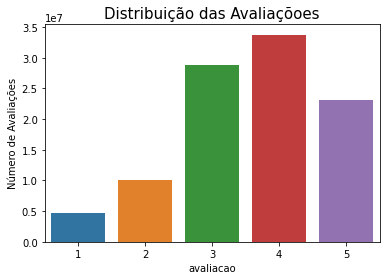

----------------------------------------------------------------------------------------------------


In [17]:
# Plot
fig, ax = plt.subplots()
plt.title('Distribuição das Avaliaçõoes', fontsize = 15)
sns.countplot(df.avaliacao)
ax.set_ylabel('Número de Avaliações')
plt.show()
print('-'*100)

### Criando csv de treino e teste para olhar só p/ o de treino por causa do tamanho dos arquivos, p/ otimizar processamento

#### 80 treino:20 teste

In [25]:
# Ordenando 
df.sort_values(by = 'data', inplace = True)

#guarando um csv com dados de treino para otimizar processamento na análise
#df.iloc[:int(df.shape[0] * 0.80)].to_csv("archive/dataset_treino.csv", index = False)
df.iloc[:int(df.shape[0] * 0.80)].to_csv('archive/dataset_treino.csv.gz'
                                         , header=True
                                         , index=False
                                         , chunksize=1000000
                                         , compression='gzip'
                                         , encoding='utf-8')

#guarando um csv com dados de treino para otimizar processamento na análise
#df.iloc[int(df.shape[0] * 0.80):].to_csv("archive/dataset_teste.csv", index = False)
df.iloc[int(df.shape[0] * 0.80):].to_csv('archive/dataset_teste.csv.gz'
                                         , header=True
                                         , index=False
                                         , chunksize=100000
                                         , compression='gzip'
                                         , encoding='utf-8')

### Próximo passo - EDA usando o dataset_treino